# 集成平均分類(Ensemble Averaging Classifier)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

# Training Data

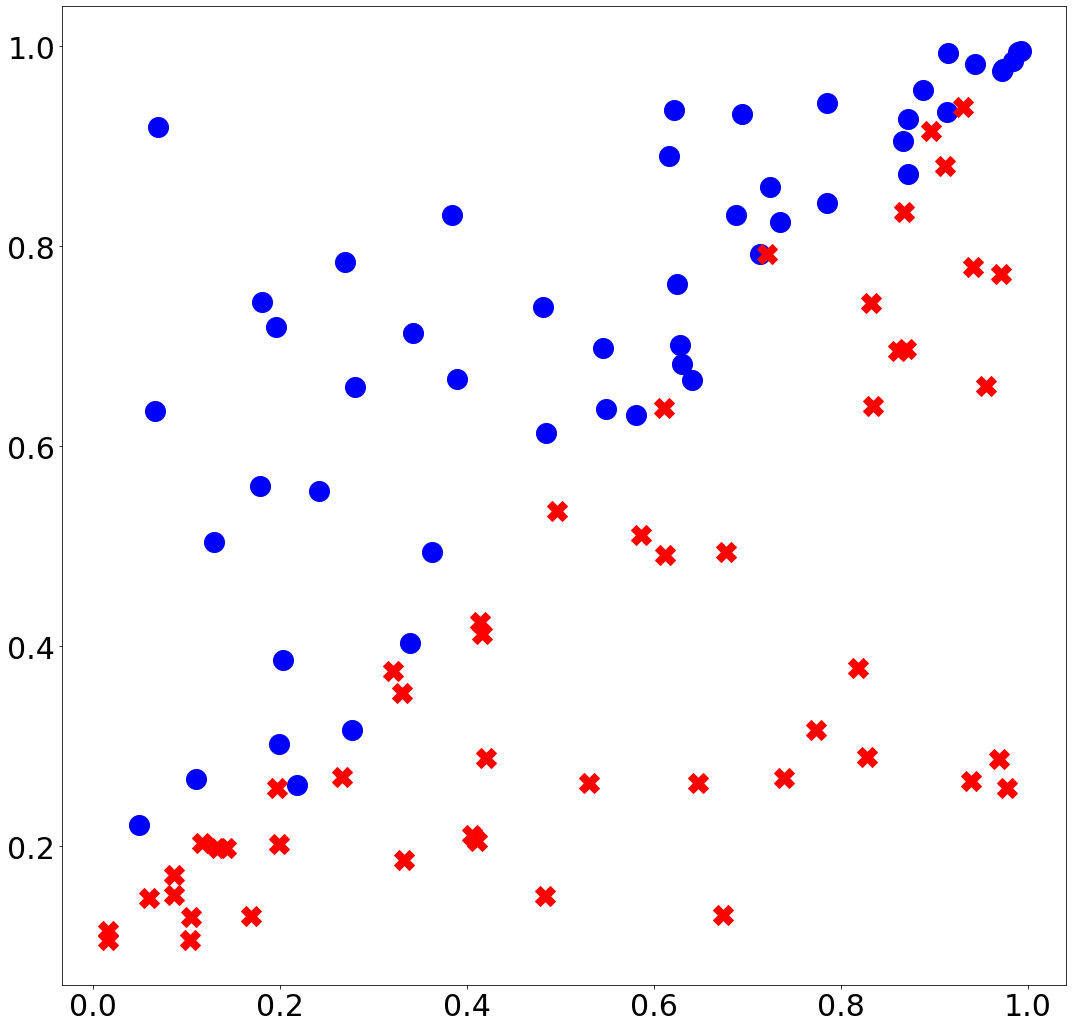

In [2]:
x=np.zeros((100,2))
y=np.zeros(100)
for i in range(0,100): 
    f=-0.1
    if(i<50):
        y[i]=1
        x[i,0]=random.random()
        x[i,1]=random.uniform(x[i,0],1)
    else:
        y[i]=-1
        x[i,0]=random.random()
        x[i,1]=random.uniform(0,x[i,0])-f
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x[:50,0],x[:50,1],"bo",markersize=20)
plt.plot(x[50:,0],x[50:,1],"rX",markersize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Polynomial Kernel

In [3]:
def Polynomial_kernel(x,xx,power,gamma,zeta):
    return (zeta+gamma*np.dot(x,xx.T))**power

# Perceptron Learning Algorithms

In [4]:
def PLA(x,y,c,gamma,zeta,N):
    a=np.ones(N)
    K=Polynomial_kernel(x,x,c,gamma,zeta)
    b=0
    nn=max((x[:,0]**2)+(x[:,0]**2))
    for i in range(0,1000):
        check=np.sign(np.dot(K,y*a)+b)==y
        i=random.randint(0,N-1)
        if(check[i]==False):
            a[i]+=1
            b+=y[i]*nn
    return a,b

# Kernel Logistic Regression

In [5]:
def KLR(x,y,c,gamma,zeta,N):
    s=0.01
    lambda_2=0.1
    K=Polynomial_kernel(x,x,c,gamma,zeta)
    a=np.zeros(N)
    for i in range(0,50000):
        A=(2*lambda_2/N)*np.dot(K,a)
        B=np.dot(K/np.outer(np.ones(N)+np.exp(-np.dot(K,a)),np.ones(N)).T,np.ones(N)-y)/N
        C=np.dot(K/np.outer(np.ones(N)+np.exp(np.dot(K,a)),np.ones(N)).T,-y)/N
        D=(2*lambda_2/N)*np.diagonal(K)
        E=np.dot((K**2)/np.outer(2*np.ones(N)+np.exp(np.dot(K,a))+np.exp(-np.dot(K,a)),np.ones(N)).T,np.ones(N))/N
        a=a-s*(A+B+C)/(D+E)
    return a

# Support Vector Machine

In [6]:
def SVM(x,y,c,CC,gamma,zeta,N):
    Q = cvxopt.matrix((np.outer(y,y) * Polynomial_kernel(x,x,c,gamma,zeta)))
    p = cvxopt.matrix(np.ones(N)*-1.,(N,1))
    G = cvxopt.matrix(np.concatenate([np.diag(np.ones(N)* 1.),np.diag(np.ones(N)* -1.)])) 
    h = cvxopt.matrix(np.concatenate([CC*np.ones(N),np.zeros(N)]))
    A = cvxopt.matrix(y,(1,N))
    b = cvxopt.matrix(0.0)
    cvxopt.solvers.options['show_progress'] = False
    cvxopt.solvers.options['abstol'] = 1e-10
    cvxopt.solvers.options['reltol'] = 1e-10
    cvxopt.solvers.options['feastol'] = 1e-10
    a=np.array(cvxopt.solvers.qp(Q, p, G, h, A, b)['x']).flatten()
    SV=[]
    for i in range(0,N):
        if(a[i]>1e-6):
            SV.append(i)
    for sv in SV:
        if(y[sv]==1):
            s_u=sv
            break
    Com=0
    for i in range(0,N):
        Com+=y[i]*a[i]*Polynomial_kernel(x[i,:],x[s_u,:],c,gamma,zeta)
    b_u=y[s_u]-Com
    for sv in SV:
        if(y[sv]==-1):
            s_l=sv
            break
    Com=0
    for i in range(0,N):
        Com+=y[i]*a[i]*Polynomial_kernel(x[i,:],x[s_l,:],c,gamma,zeta)
    b_l=y[s_l]-Com
    return a,(b_u+b_l)/2

# Plot

In [7]:
def PLOT(x,y,c,gamma,zeta,a,b,classifier):
    if((classifier=='SVM')or(classifier=='PLA')):
        mul=a*y
    else:
        mul=a
    if(classifier=='SVM'):
        color='go'
    elif(classifier=="KLR"):
        color='yo'
    elif(classifier=="PLA"):
        color='mo'
    else:
        color='ko'
    x1=np.linspace(min(x[:,0]),max(x[:,0]),500)
    x2=np.linspace(min(x[:,1]),max(x[:,1]),500)
    temp_array=np.zeros((500,2))
    temp_array[:,0],temp_array[:,1]=x1,np.ones(500)*x2[1]
    #plt.rcParams["figure.figsize"] = (18,18)
    for i in range(0,500):
        temp_array=np.zeros((500,2))
        temp_array[:,0],temp_array[:,1]=x1,np.ones(500)*x2[i]
        temp_a=np.dot(Polynomial_kernel(temp_array,x,c,gamma,zeta),mul)+b
        for j in range(0,len(temp_a)-1):
            if(np.sign(temp_a[j])!=np.sign(temp_a[j+1])):
                plt.plot((x1[j]+x1[j+1])/2,x2[i],color)
    for i in range(0,500):
        temp_array=np.zeros((500,2))
        temp_array[:,0],temp_array[:,1]=np.ones(500)*x1[i],x2
        temp_a=np.dot(Polynomial_kernel(temp_array,x,c,gamma,zeta),mul)+b
        for j in range(0,len(temp_a)-1):
            if(np.sign(temp_a[j])!=np.sign(temp_a[j+1])):
                plt.plot(x1[i],(x2[j]+x2[j+1])/2,color)  
    plt.plot(x1[i],(x2[j]+x2[j+1])/2,color,label=classifier)
    plt.plot(x[:50,0],x[:50,1],"bo",markersize=20)
    plt.plot(x[50:,0],x[50:,1],"rX",markersize=20)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(fontsize=30)
    return 

# Testing Data

In [8]:
N=100
c=5
gamma=1
zeta=1
N_test=20
x_test=np.zeros((N_test,2))
y_test=np.zeros(N_test)
for i in range(0,N_test): 
    f=-0.1
    if(i<N_test/2):
        y_test[i]=1
        x_test[i,0]=random.random()
        x_test[i,1]=random.uniform(x_test[i,0],1)
    else:
        y_test[i]=-1
        x_test[i,0]=random.random()
        x_test[i,1]=random.uniform(0,x_test[i,0])-f

# Individual Classifier

In [9]:
a_SVM,b_SVM=SVM(x,y,c,100,gamma,zeta,N)
a_PLA,b_PLA=PLA(x,y,c,gamma,zeta,N)
logit_y=np.zeros(N)
logit_y[y==1]=np.ones(50)
a_KLR=KLR(x,logit_y,c,gamma,zeta,N)
K=Polynomial_kernel(x,x,c,gamma,zeta)
K_test=Polynomial_kernel(x_test,x,c,gamma,zeta)
print("the SVM traning error",round(1-len(y[np.sign(np.dot(K,a_SVM*y)+b_SVM)==y])/N,2),
     "testing error", round(1-len(y_test[np.sign(np.dot(K_test,a_SVM*y)+b_SVM)==y_test])/N_test,2))
print("the PLA traning error",round(1-len(y[np.sign(np.dot(K,a_PLA*y)+b_PLA)==y])/N,2),
     "testing error", round(1-len(y_test[np.sign(np.dot(K_test,a_PLA*y)+b_PLA)==y_test])/N_test,2))
print("the SVM traning error",round(1-len(y[np.sign(np.dot(K,a_KLR))==y])/N,2),
     "testing error", round(1-len(y_test[np.sign(np.dot(K_test,a_KLR))==y_test])/N_test,2))

the SVM traning error 0.07 testing error 0.1
the PLA traning error 0.21 testing error 0.1
the SVM traning error 0.1 testing error 0.05


# Ensemble Averaging

the Mix Models traning error 0.15 testing error 0.1


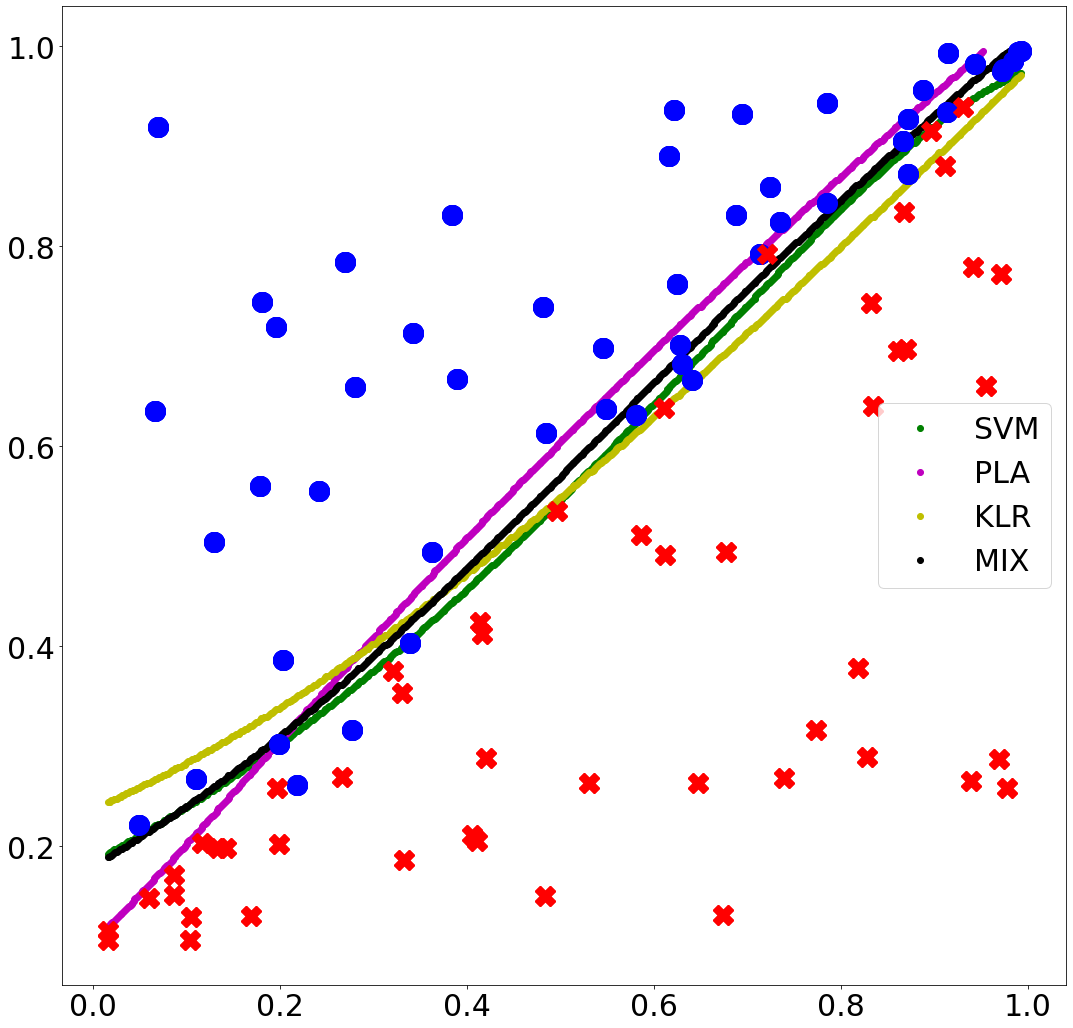

In [10]:
c_SVM,c_PLA,c_KLR=10,1,10
a_MIX=(c_SVM*a_SVM*y+c_PLA*a_PLA*y+c_KLR*a_KLR)/(c_SVM+c_PLA+c_KLR)
b_MIX=(c_SVM*b_SVM+c_PLA*b_PLA)/(c_SVM+c_PLA+c_KLR)
print("the Mix Models traning error",round(1-len(y[np.sign(np.dot(K,a_MIX)+b_MIX)==y])/N,2),
     "testing error", round(1-len(y_test[np.sign(np.dot(K_test,a_MIX)+b_MIX)==y_test])/N_test,2))
plt.rcParams["figure.figsize"] = (18,18)
PLOT(x,y,c,gamma,zeta,a_SVM,b_SVM,'SVM')
PLOT(x,y,c,gamma,zeta,a_PLA,b_PLA,'PLA')
PLOT(x,logit_y,c,gamma,zeta,a_KLR,0,'KLR')
PLOT(x,y,c,gamma,zeta,(c_SVM*a_SVM*y+c_PLA*a_PLA*y+c_KLR*a_KLR)/(c_SVM+c_PLA+c_KLR),
     (c_SVM*b_SVM+c_PLA*b_PLA)/(c_SVM+c_PLA+c_KLR),'MIX')
plt.show()